# Spike-in preliminary Analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
serial_dilution_values = pd.read_csv("data/serial_dilution_values.csv")

In [11]:
serial_dilution_values

,Dilution,Stock Concentration,WW Concentration,Dilution Amount
0,1,5.500000e+08,5.500000e+06,NaN
1,2,2.750000e+07,2.750000e+05,1:20
2,3,1.380000e+06,1.380000e+04,1:20
3,4,6.880000e+04,6.880000e+02,1:20
4,5,3.440000e+03,3.440000e+01,1:20
5,6,1.720000e+02,1.720000e+00,1:20
6,7,8.590000e+00,8.590000e-02,1:20
7,8,0.000000e+00,0.000000e+00,NaN


In [12]:
ww_dilutions = serial_dilution_values['WW Concentration'][:-1] # in uL

ww_dilutions = ww_dilutions * 1000.0 # in mL

ww_dilutions = np.log10(ww_dilutions) # log base 10

In [13]:
ww_dilutions_df = pd.DataFrame({'Dilution': serial_dilution_values['Dilution'][:-1], 'Concentration': ww_dilutions})

In [14]:
ww_dilutions_df.head()

,Dilution,Concentration
0,1,9.740363
1,2,8.439333
2,3,7.139879
3,4,5.837588
4,5,4.536558


In [15]:
data = pd.read_csv("data/sample_vs_ct.csv")
data.columns = ['Dilution','CT']

In [16]:
data.head()

,Dilution,CT
0,1,11.557
1,1,11.811
2,1,11.928
3,2,15.864
4,2,15.840


In [17]:
data = pd.merge(data, ww_dilutions_df, how='left', on='Dilution')


In [18]:
data

,Dilution,CT,Concentration
0,1,11.557,9.740363
1,1,11.811,9.740363
2,1,11.928,9.740363
3,2,15.864,8.439333
4,2,15.840,8.439333
...,...,...,...
58,6,33.594,3.235528
59,6,33.552,3.235528
60,7,36.826,1.933993
61,7,36.458,1.933993


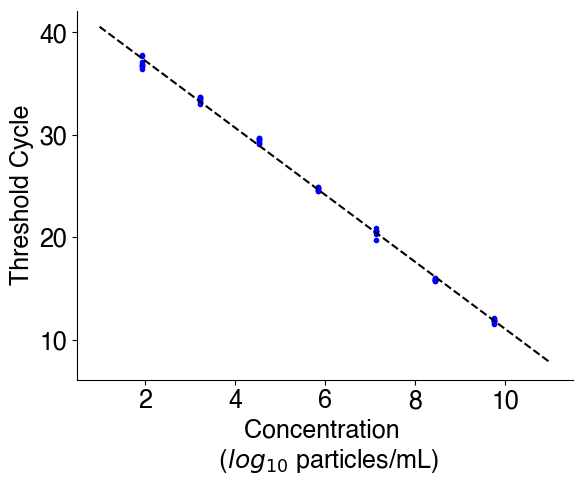

In [23]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size': 18})
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(data['Concentration'],data['CT'],'.b')
plt.xlabel("Concentration \n ($log_{10}$ particles/mL)")
plt.ylabel("Threshold Cycle")


slope, intercept, r_value, p_value, std_err = stats.linregress(data['Concentration'], data['CT'])
trendline = np.arange(1,12)*slope + intercept;

equation = 'y = '+str(np.round(slope,3))+'x + '+ str(np.round(intercept,3));

E = (-1 + 10**(-1/slope))*100

ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')

plt.plot(np.arange(1,12),trendline,'--k')
plt.savefig('results.pdf')
plt.show()

In [21]:
r2 = abs(np.round(r_value,3))
efficiency = np.round(E,3)

print(f'''R^2 = {r2}, Efficiency = {efficiency}''')


R^2 = 0.999, Efficiency = 101.687
